In [2]:
import numpy as np
import pandas as pd
import math

# import mud

import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sys.path.insert(0,os.path.dirname(os.getcwd()))

from dc_models.models import *
from dc_utils.plots import _plot_states, _print_dims, _create_paramdf

# Lotka-Volterra Model

In [3]:
# pp_args ={
#     'state_init': np.array([4,2]),
#     'time_step': 1000,
#     'tend':200,
#     'intervals':1
#     }

pp_args ={
    'state_init': np.array([4,2]),
    'true_model': False,
    'num_tsteps': 1000,
    'tend':200,
    'num_parameters':4,
    'lambda_true': [0.5]*4,
    'supports': [[0,1]]*4,
    'drift_windows':4,
    'assim_windows':1
    }

pp_model = lotka_volterra(**pp_args)
pp_model._run_model()
pp_states, pp_params, pp_times = pp_model._get_outputs()

states dim (4, 250, 2)
parameters dim (4, 4)
times dim (4, 250)


,$\alpha$,$\beta$,$\delta$,$\gamma$
Interval,,,,
0,0.341782,0.489434,0.071997,0.360369
1,0.659581,0.231505,0.246489,0.380387
2,0.324329,0.995217,0.889593,0.009531
3,0.618238,0.712845,0.686215,0.907510


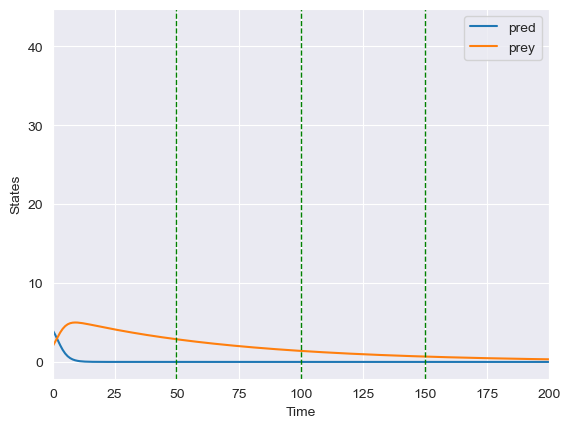

In [4]:

ppdf = _create_paramdf(pp_params,cols='pp',names=None)

_print_dims(pp_model)
display(ppdf)
_plot_states(pp_states,pp_times,['pred','prey'])

# SIR Model

In [11]:
sargs ={
    'state_init': np.array([350-1-0,1,0]),
    'time_step': 160,
    'tend':160,
    'N':350,
    'intervals':5
    }

sir_model = sir(**sargs)
sir_model._run_model()
sir_states, sir_params, sir_times = sir_model._get_outputs()

states dim (5, 32, 3)
parameters dim (5,)
times dim (5, 32)


,$R_0$
Interval,
0,0.636507
1,1.261117
2,1.059735
3,1.193507
4,2.864315


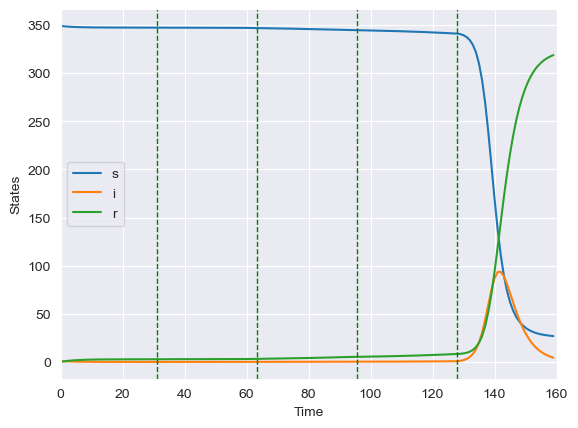

In [12]:

sirdf = _create_paramdf(sir_params,cols='sir')

_print_dims(sir_model)
display(sirdf)
_plot_states(sir_states,sir_times,['s','i','r'])

# RLC Model

In [6]:
rargs ={
    'state_init': np.array([0,0]),
    'time_step': 200,
    'tend':200,
    'intervals':5
    }

rlc_model = rlc(**rargs)
rlc_model._run_model()
rlc_states, rlc_params, rlc_times = rlc_model._get_outputs()

states dim (5, 40, 2)
parameters dim (5, 3)
times dim (5, 40)


,$R$,$L$,$C$
Interval,,,
0,0.351182,0.002728,0.602841
1,0.439466,0.110989,0.807373
2,0.523061,0.182442,0.733745
3,0.177190,0.982276,0.551699
4,0.624551,0.211170,0.514395


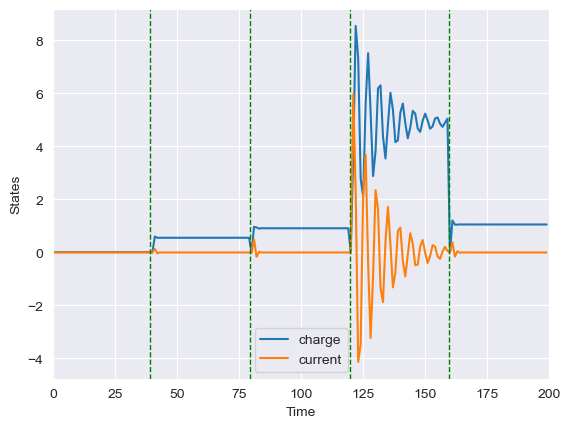

In [7]:
rlcdf = _create_paramdf(rlc_params,cols='rlc')

_print_dims(rlc_model)
display(rlcdf)
_plot_states(rlc_states,rlc_times,['charge','current'])